Try to use decomposition package installed in Python to control seasonality.

Time series data has three parts: 1. Trend 2. Seasonality 3. Residuals(Noise)

### Import Pacages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

### Import Files

In [3]:
df = pd.read_csv('C:/.../.../...csv')
df

,sales,date
0,3817658.480,1/6/2018
1,6668008.060,2/1/2020
2,6206244.422,4/4/2020
3,5295931.910,2/10/2018
4,4710018.800,4/21/2018
...,...,...
119,4605660.830,12/1/2018
120,5578753.530,12/14/2019
121,5732494.960,2/15/2020
122,5695087.738,4/25/2020


### Data Wrangling

In [4]:
df['date'] = pd.to_datetime(df['date'])
ts = df.sort_values(by=['date'])

# set date as index
ts.set_index('date',inplace=True)
ts

,sales
date,
2018-01-06,3817658.480
2018-01-13,3921779.230
2018-01-20,4600659.690
2018-01-27,5088864.540
2018-02-03,6609959.740
...,...
2020-04-18,5379801.290
2020-04-25,5695087.738
2020-05-02,5016393.360


### EDA

Text(0, 0.5, 'Weekly Sales')

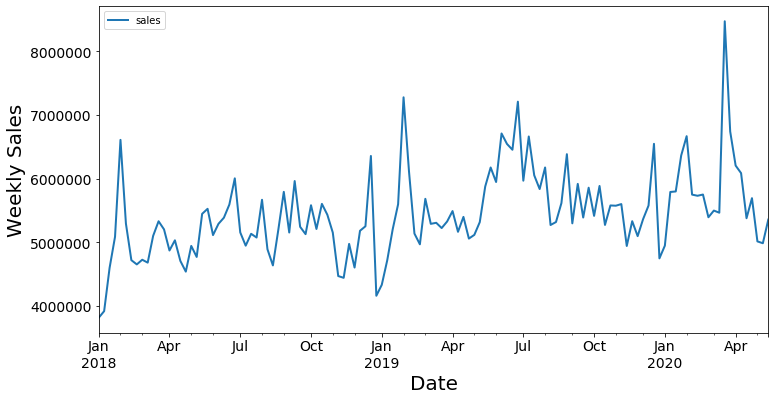

In [6]:
ts.plot(figsize=(12,6), linewidth=2, fontsize=14)
plt.xlabel('Date', fontsize=20)
plt.ylabel("Weekly Sales", fontsize=20)

### Decomposition

In [7]:
decomposition = seasonal_decompose(ts, model="additive",period=13)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

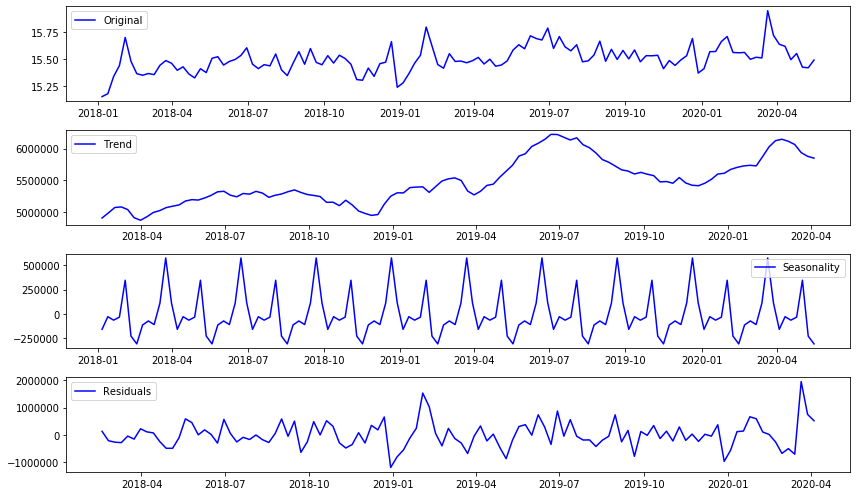

In [8]:
plt.figure(figsize=(12,7))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

### Compare Trend with Original Time Series

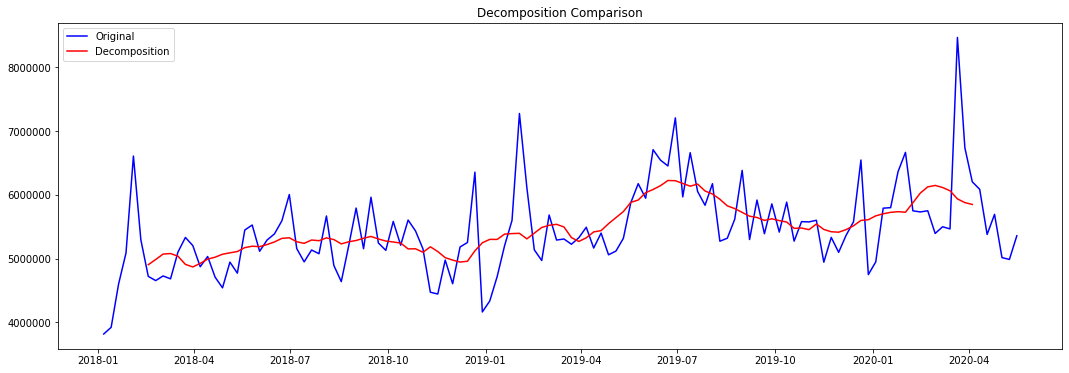

In [10]:
fig = plt.figure(figsize=(18,6))
origin = plt.plot(ts, color='blue', label='Original')
decomp = plt.plot(trend, color='red', label = 'Decomposition')
plt.legend(loc='best')
plt.title('Decomposition Comparison')
plt.show(block=False)

### Export Trend Data

In [12]:
trend = decomposition.trend
trend.dropna(inplace=True)

# set back date as a column
trend = trend.to_frame().reset_index()

trend_sales = trend.rename(columns={'trend':'sales'})

In [13]:
trend_sales

,date,sales
0,2018-02-17,4.904907e+06
1,2018-02-24,4.986119e+06
2,2018-03-03,5.071636e+06
3,2018-03-10,5.080048e+06
4,2018-03-17,5.037968e+06
...,...,...
107,2020-03-07,6.116584e+06
108,2020-03-14,6.065058e+06
109,2020-03-21,5.938011e+06
110,2020-03-28,5.879306e+06


In [ ]:
trend.to_csv('C:/.../.../...csv')